In [1]:
library(caret)
library(glmnet)
library(boot)

Loading required package: lattice
Loading required package: ggplot2
Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-16


Attaching package: ‘boot’

The following object is masked from ‘package:lattice’:

    melanoma



In [2]:
all_data <- tail(read.csv("../btc_data_csv/imp_coin.csv"),517)[-c(1,2,4,5,6,8)]
# [c(3,7,9,15,21,27,33,39,45)]
# all_data <- tail(read.csv("../imp_coin.csv")[c(3,7,9,13,15,19,21,25,27,31,33,37,39,43)], 1000)

btc_price btc_open btc_high btc_low btc_vol btc_change
bch_price bch_open bch_high bch_low bch_vol bch_change
eos_price eos_open eos_high eos_low eos_vol eos_change 
eth_price eth_open eth_high eth_low eth_vol eth_change
ltc_price ltc_open ltc_high ltc_low ltc_vol ltc_change
usdt_price usdt_open usdt_high usdt_low usdt_vol usdt_change
xrp_price xrp_open xrp_high xrp_low xrp_vol xrp_change
btcsv_price btcsv_open btcsv_high btcsv_low btcsv_vol btcsv_change

# Create glm model on all data from 2017

## test on step on all variable result

In [3]:
lm_all <- glm(eth_price~ btc_price + btc_vol+
bch_price+ bch_open+ bch_high+ bch_low +bch_vol+ bch_change+
eos_price +eos_open +eos_high+ eos_low+ eos_vol+ eos_change+
eth_vol+
ltc_price+ ltc_open+ ltc_high+ ltc_low+ ltc_vol+ ltc_change+
usdt_price+ usdt_open+ usdt_high+ usdt_low+ usdt_vol+ usdt_change+
xrp_price+ xrp_open+ xrp_high+ xrp_low+ xrp_vol+ xrp_change+
btcsv_price+ btcsv_open+ btcsv_high+ btcsv_low+ btcsv_vol+ btcsv_change, data = all_data)

In [4]:
cv.glm(all_data, lm_all, K = 10)$delta
step(data=all_data, lm_all, direction="both",k=10)

[1] 8931.111 8718.757

Start:  AIC=6349.22
eth_price ~ btc_price + btc_vol + bch_price + bch_open + bch_high + 
    bch_low + bch_vol + bch_change + eos_price + eos_open + eos_high + 
    eos_low + eos_vol + eos_change + eth_vol + ltc_price + ltc_open + 
    ltc_high + ltc_low + ltc_vol + ltc_change + usdt_price + 
    usdt_open + usdt_high + usdt_low + usdt_vol + usdt_change + 
    xrp_price + xrp_open + xrp_high + xrp_low + xrp_vol + xrp_change + 
    btcsv_price + btcsv_open + btcsv_high + btcsv_low + btcsv_vol + 
    btcsv_change

               Df Deviance    AIC
- eos_change    1  2998118 6339.2
- btcsv_open    1  2998193 6339.2
- btcsv_vol     1  2998619 6339.3
- ltc_price     1  2998621 6339.3
- xrp_price     1  2998627 6339.3
- bch_change    1  2998659 6339.3
- ltc_high      1  2998770 6339.3
- bch_high      1  2998888 6339.4
- ltc_low       1  2999133 6339.4
- ltc_vol       1  2999899 6339.5
- xrp_low       1  3001127 6339.7
- usdt_open     1  3001338 6339.8
- eos_price     1  3002489 6340.0
- btcs


Call:  glm(formula = eth_price ~ btc_price + btc_vol + bch_open + bch_low + 
    eos_high + eos_low + eos_vol + eth_vol + ltc_open + ltc_change + 
    usdt_price + usdt_high + usdt_vol + xrp_open + xrp_high + 
    btcsv_price, data = all_data)

Coefficients:
(Intercept)    btc_price      btc_vol     bch_open      bch_low     eos_high  
 -2.614e+02   -1.138e-02   -1.272e-05   -1.855e-01    2.795e-01    4.678e+01  
    eos_low      eos_vol      eth_vol     ltc_open   ltc_change   usdt_price  
 -3.818e+01   -1.679e-06   -4.346e-06    1.376e+00    2.861e+00    2.429e+03  
  usdt_high     usdt_vol     xrp_open     xrp_high  btcsv_price  
 -1.956e+03    7.758e-06    4.235e+02   -2.268e+02   -1.048e+00  

Degrees of Freedom: 516 Total (i.e. Null);  500 Residual
Null Deviance:	    36380000 
Residual Deviance: 3206000 	AIC: 6018

In [5]:
set.seed(1)
training.samples <- createDataPartition(all_data$eth_price, p = 0.7, list = FALSE)
train.data  <- all_data[training.samples, ]
test.data <- all_data[-training.samples, ]

test_model = glm(formula = eth_price ~ btc_price + btc_vol + bch_open + bch_low + eos_high + eos_low + eos_vol + eth_vol + ltc_open + ltc_change + usdt_price + usdt_high + usdt_vol + xrp_open + xrp_high + btcsv_price, data = train.data)
a = test.data[c('btc_price', 'btc_vol', 'bch_open', 'bch_low', 'eos_high', 'eos_low', 'eos_vol', 'eth_vol', 'ltc_open', 'ltc_change', 'usdt_price','usdt_high', 'usdt_vol','xrp_open', 'xrp_high','btcsv_price')]

pred = predict(test_model, a)
# plot.ts(test.data$eth_price)
# lines(pred, col="green")
mean((test.data$eth_price - pred)^2)

[1] 8313.144

## test on step on Price Variable
the result of cv is higher(10360) than the first step result (8487)
and the MSE after training is higher MSE= 9296 > 8313

In [6]:
price_model = glm(formula = eth_price ~ bch_price + eos_price + btc_price + ltc_price + usdt_price + xrp_price + btcsv_price,data = all_data)
cv.glm(all_data, price_model, K = 10)$delta
step(data=all_data, price_model, direction="both",k=10)

[1] 10360.06 10333.07

Start:  AIC=6303.39
eth_price ~ bch_price + eos_price + btc_price + ltc_price + usdt_price + 
    xrp_price + btcsv_price

              Df Deviance    AIC
- usdt_price   1  5137517 6297.7
<none>            5095169 6303.4
- bch_price    1  5353201 6318.9
- btc_price    1  5463518 6329.5
- btcsv_price  1  5638688 6345.8
- eos_price    1  5843307 6364.2
- xrp_price    1  6042207 6381.5
- ltc_price    1  6381679 6409.8

Step:  AIC=6297.67
eth_price ~ bch_price + eos_price + btc_price + ltc_price + xrp_price + 
    btcsv_price

              Df Deviance    AIC
<none>            5137517 6297.7
+ usdt_price   1  5095169 6303.4
- bch_price    1  5450216 6318.2
- btc_price    1  5595400 6331.8
- btcsv_price  1  5718349 6343.0
- eos_price    1  5843568 6354.2
- xrp_price    1  6056321 6372.7
- ltc_price    1  6684486 6423.8



Call:  glm(formula = eth_price ~ bch_price + eos_price + btc_price + 
    ltc_price + xrp_price + btcsv_price, data = all_data)

Coefficients:
(Intercept)    bch_price    eos_price    btc_price    ltc_price    xrp_price  
  168.42607      0.10632     11.50097     -0.02469      2.13648    172.07929  
btcsv_price  
   -1.48409  

Degrees of Freedom: 516 Total (i.e. Null);  510 Residual
Null Deviance:	    36380000 
Residual Deviance: 5138000 	AIC: 6242

In [7]:
set.seed(1)
training.samples <- createDataPartition(all_data$eth_price, p = 0.7, list = FALSE)
train.data  <- all_data[training.samples, ]
test.data <- all_data[-training.samples, ]

price_model = glm(formula = eth_price ~ bch_price + eos_price + btc_price + ltc_price + usdt_price + xrp_price + btcsv_price ,data = train.data)
a = test.data[c('bch_price', 'btc_price', 'ltc_price', 'usdt_price', 'btcsv_price', 'eos_price', 'xrp_price')]

pred = predict(price_model, a)
# plot.ts(test.data$eth_price)
# lines(pred, col="green")
mean((test.data$eth_price - pred)^2)

[1] 9296.108

## Test on volume variable
have the  highest cv result 57923 and MSE = 52907 on training

In [8]:
volume_model = glm(formula = eth_price ~ bch_vol + btc_vol + ltc_vol + usdt_vol + btcsv_vol ,data = all_data)
cv.glm(all_data, volume_model, K = 10)$delta
step(data=all_data, volume_model, direction="both",k=10)

[1] 57923.76 57816.08

Start:  AIC=7181.53
eth_price ~ bch_vol + btc_vol + ltc_vol + usdt_vol + btcsv_vol

            Df Deviance    AIC
- ltc_vol    1 28959900 7171.7
- usdt_vol   1 29465597 7180.7
<none>         28948192 7181.5
- bch_vol    1 29721141 7185.2
- btc_vol    1 30916954 7205.5
- btcsv_vol  1 31130645 7209.1

Step:  AIC=7171.74
eth_price ~ bch_vol + btc_vol + usdt_vol + btcsv_vol

            Df Deviance    AIC
- usdt_vol   1 29466314 7170.7
<none>         28959900 7171.7
- bch_vol    1 29759010 7175.8
+ ltc_vol    1 28948192 7181.5
- btc_vol    1 31101757 7198.6
- btcsv_vol  1 31315747 7202.2

Step:  AIC=7170.7
eth_price ~ bch_vol + btc_vol + btcsv_vol

            Df Deviance    AIC
<none>         29466314 7170.7
+ usdt_vol   1 28959900 7171.7
- bch_vol    1 30271866 7174.6
+ ltc_vol    1 29465597 7180.7
- btcsv_vol  1 31408396 7193.7
- btc_vol    1 31733132 7199.0



Call:  glm(formula = eth_price ~ bch_vol + btc_vol + btcsv_vol, data = all_data)

Coefficients:
(Intercept)      bch_vol      btc_vol    btcsv_vol  
  5.359e+02   -1.595e-04   -3.944e-05   -3.895e-04  

Degrees of Freedom: 516 Total (i.e. Null);  513 Residual
Null Deviance:	    36380000 
Residual Deviance: 29470000 	AIC: 7139

In [9]:
set.seed(1)
training.samples <- createDataPartition(all_data$eth_price, p = 0.7, list = FALSE)
train.data  <- all_data[training.samples, ]
test.data <- all_data[-training.samples, ]

price_model = glm(formula = eth_price ~ bch_vol + btc_vol + btcsv_vol , data = train.data)
a = test.data[c('bch_vol', 'btc_vol','btcsv_vol')]

pred = predict(price_model, a)
# plot.ts(test.data$btc_price)
# lines(pred, col="green")
mean((test.data$eth_price - pred)^2)

[1] 52907.16

# Lasso

Lasso MSE is 132

In [10]:
training.samples <- createDataPartition(all_data$eth_price, p = 0.7, list = FALSE)
train.data  <- all_data[training.samples, ]
test.data <- all_data[-training.samples, ]

# train.data  <- head(all_data, 400)
# test.data <- tail(all_data, -400)

In [11]:
x <- model.matrix(eth_price~., train.data)[,-1]
y <- as.double(train.data$eth_price)
x.test <- model.matrix(eth_price ~., test.data)[,-1]
lambdas_to_try <- 10^seq(-3, 10, length.out = 100)
set.seed(1) 
cv.lasso <- cv.glmnet(x, y, alpha = 1, type.measure='mse', lambda = lambdas_to_try, nfolds = 10)

In [12]:
model_10_nfolds <- glmnet(x, y, alpha = 1, family = "gaussian", lambda = cv.lasso$lambda.min)
pred_10 = predict(model_10_nfolds, newx = x.test)

In [13]:
mean((test.data$eth_price - pred_10)^2)

[1] 132.6874

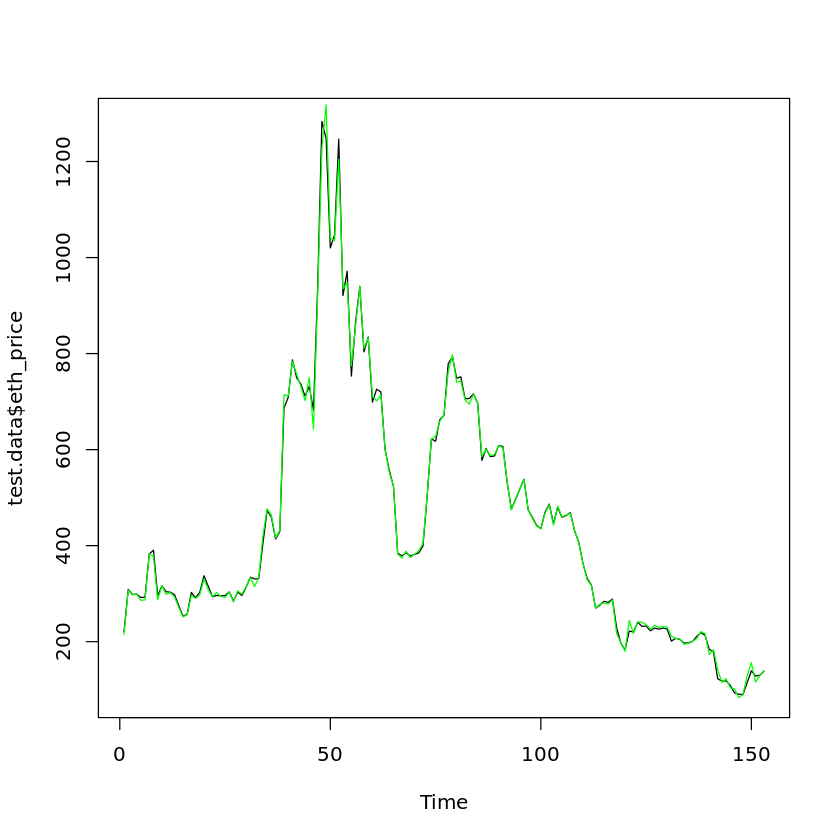

In [14]:
plot.ts(test.data$eth_price)
lines(pred_10, col="green")

## delay one one
MSE of one day delay is 4377

[1] 4377.221

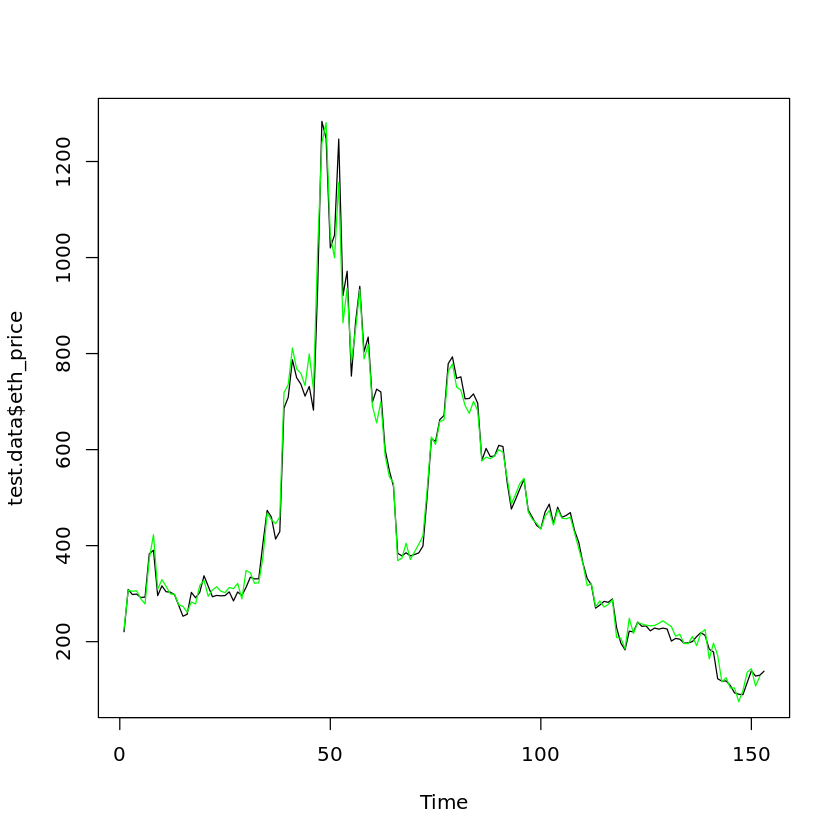

In [15]:
training.samples <- createDataPartition(all_data$eth_price, p = 0.7, list = FALSE)
train.data  <- all_data[training.samples, ]
test.data <- all_data[-training.samples, ]
x <- head(model.matrix(eth_price~., train.data)[,-1], -1)
y <- tail(as.double(train.data$eth_price), -1)
x.test <- head(model.matrix(eth_price ~., test.data)[,-1], -1)
lambdas_to_try <- 10^seq(-3, 10, length.out = 100)
set.seed(1) 
cv.lasso <- cv.glmnet(x, y, alpha = 1, type.measure='mse', lambda = lambdas_to_try, nfolds = 10)
model_10_nfolds <- glmnet(x, y, alpha = 1, family = "gaussian", lambda = cv.lasso$lambda.min)
pred_10 = predict(model_10_nfolds, newx = x.test)
mean((tail(test.data$eth_price,-1) - pred_10)^2)
plot.ts(test.data$eth_price)
lines(pred_10, col="green")

# Testing on the 3 coin with dealy 3 day

the file in genrated to predict the price of btc price based on the 3 days before of 3 coins(eth, ltc, xrp)  + btc price.
and the result of training based on createDataPartition has higher MSE while training on the first 80%.

we test 3 model :

1) all variable       , mse = 507, cv = 868

2) variable after step, mse = 286, cv = 855

3) only eth price     , mse = 135, cv = 907

In [16]:
all_data_3 <- read.csv("../coin_3_day.csv")[-c(4,12,16)]

In [17]:
head(all_data_3)

btc,btc_1,btc_2,eth,eth_1,eth_2,eth_3,ltc,ltc_1,ltc_2,xrp,xrp_1,xrp_2
995.4,1017.0,1033.3,8.20,8.37,9.74,11.00,4.51,4.56,4.55,0.00635,0.00631,0.00641
1017.0,1033.3,1135.4,8.37,9.74,11.00,10.15,4.56,4.55,4.55,0.00631,0.00641,0.00641
1033.3,1135.4,989.3,9.74,11.00,10.15,10.08,4.55,4.55,4.23,0.00641,0.00641,0.00628
1135.4,989.3,886.2,11.00,10.15,10.08,9.84,4.55,4.23,3.88,0.00641,0.00628,0.00622
989.3,886.2,888.9,10.15,10.08,9.84,10.28,4.23,3.88,3.98,0.00628,0.00622,0.00636
886.2,888.9,900.9,10.08,9.84,10.28,10.26,3.88,3.98,4.03,0.00622,0.00636,0.00625


In [18]:
lm_3 <- glm(formula = eth_3 ~ btc + btc_1 + btc_2 + eth + eth_1 + eth_2 + ltc + ltc_1 + ltc_2 + xrp + xrp_1 + xrp_2 , data = all_data_3)
cv.glm(all_data_3, lm_3, K = 10)$delta
step(data=all_data_3, lm_3, direction="both",k=10)

[1] 868.5634 863.5176

Start:  AIC=7045.63
eth_3 ~ btc + btc_1 + btc_2 + eth + eth_1 + eth_2 + ltc + ltc_1 + 
    ltc_2 + xrp + xrp_1 + xrp_2

        Df Deviance    AIC
- ltc_1  1   567657 7035.7
- btc_2  1   568401 7036.7
- ltc_2  1   570362 7039.2
- ltc    1   570457 7039.3
- btc    1   571452 7040.6
- btc_1  1   571556 7040.7
<none>       567600 7045.6
- xrp_2  1   575989 7046.3
- xrp    1   579240 7050.4
- eth_1  1   584341 7056.8
- eth    1   585640 7058.4
- xrp_1  1   591772 7066.0
- eth_2  1   857148 7335.7

Step:  AIC=7035.71
eth_3 ~ btc + btc_1 + btc_2 + eth + eth_1 + eth_2 + ltc + ltc_2 + 
    xrp + xrp_1 + xrp_2

        Df Deviance    AIC
- btc_2  1   568661 7027.0
- btc    1   571561 7030.7
- ltc    1   571961 7031.2
- btc_1  1   572023 7031.3
- ltc_2  1   573802 7033.5
<none>       567657 7035.7
- xrp_2  1   576072 7036.4
- xrp    1   579448 7040.7
+ ltc_1  1   567600 7045.6
- eth_1  1   585656 7048.4
- eth    1   586989 7050.1
- xrp_1  1   591986 7056.3
- eth_2  1   863524 7331.1

Step:  AIC=


Call:  glm(formula = eth_3 ~ eth + eth_1 + eth_2 + ltc + ltc_2 + xrp + 
    xrp_1 + xrp_2, data = all_data_3)

Coefficients:
(Intercept)          eth        eth_1        eth_2          ltc        ltc_2  
     2.5890       0.1979      -0.2609       1.0123      -0.3498       0.4248  
        xrp        xrp_1        xrp_2  
   -88.2001     181.2245     -70.5389  

Degrees of Freedom: 727 Total (i.e. Null);  719 Residual
Null Deviance:	    56180000 
Residual Deviance: 573300 	AIC: 6941

In [19]:
test3= glm(formula = eth_3 ~ eth + eth_1 + eth_2 + ltc + ltc_2 + xrp + 
    xrp_1 + xrp_2, data = all_data_3)
cv.glm(all_data_3, test3, K = 10)$delta

[1] 855.2162 851.4995

In [20]:
test3= glm(formula = eth_3 ~ eth + eth_1 + eth_2 , data = all_data_3)
cv.glm(all_data_3, test3, K = 10)$delta

[1] 931.9216 928.3514

[1] 135.7281

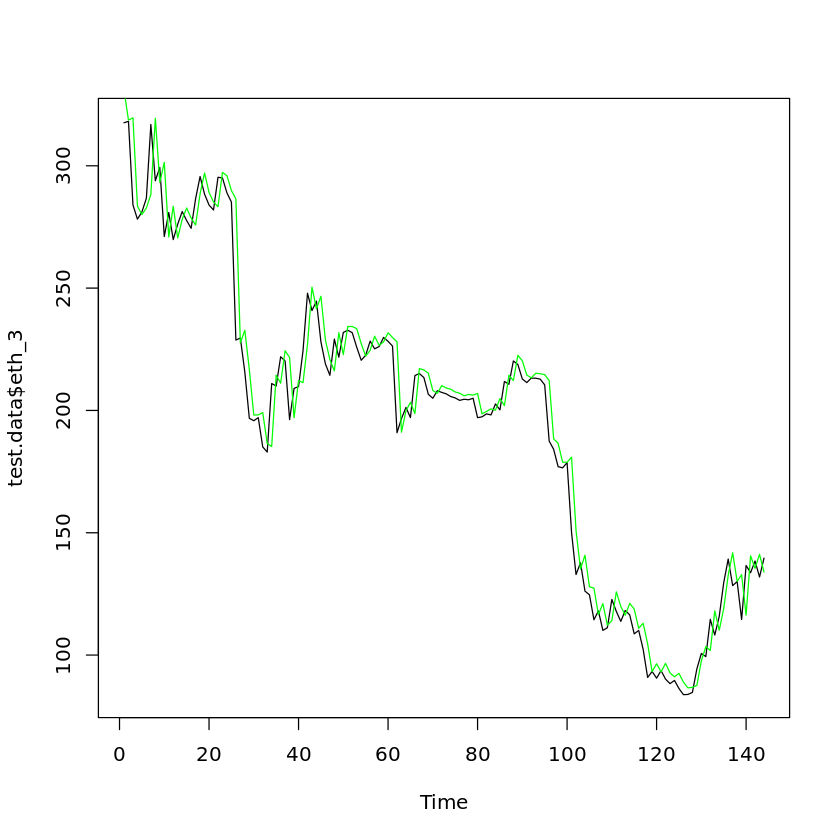

In [21]:
set.seed(1)
# training.samples <- createDataPartition(all_data_3$btc_3, p = 0.8, list = FALSE)
# train.data  <- all_data_3[training.samples, ]
# test.data <- all_data_3[-training.samples, ]

train.data  <- head(all_data_3, 584)
test.data <- tail(all_data_3, -584)

test3 <- glm(formula = eth_3 ~ eth + eth_1 + eth_2, data = train.data)

pred_5 = predict(test3, test.data[-7])
plot.ts(test.data$eth_3)
lines(pred_5, col="green")

mean((test.data$eth_3 - pred_5)^2)